In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score, confusion_matrix # 분류에서 사용
from sklearn.metrics import mean_squared_error, mean_absolute_error # 회귀에서 사용

from tensorflow import keras

In [43]:
# CSV 파일 불러오기
df = pd.read_csv("D:/kc_house_data.csv")
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [44]:
# 열 이름 확인
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [45]:
# 결측치 확인
print("\n결측치 확인:")
print(df.isnull().sum()) 


결측치 확인:
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


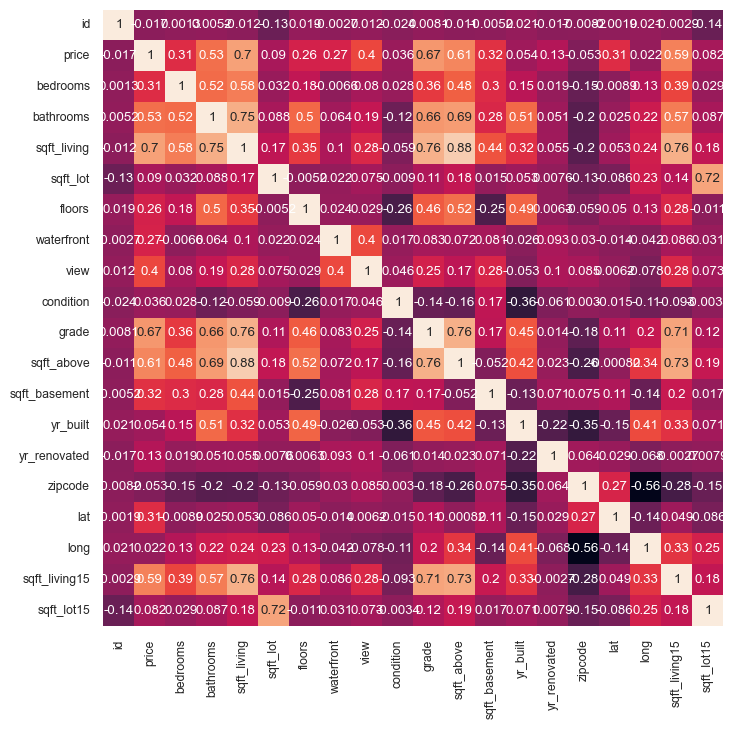

In [46]:
#상관관계 행렬
#0.3이상일 시 상관관계, 0.7이상일시 매우높음.
df_corr = df.corr()

# heatmap
plt.figure(figsize=(8,8))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [47]:
# 분류 문제에서 클래스 불균형 확인할 때 사용하므로 회귀에서는 필요없는 코드이다!

# 레이블 개수 확인(imbalanced data) - 숫자
print("\n레이블 개수 확인:")
df['price'].value_counts()


레이블 개수 확인:


350000.0     172
450000.0     172
550000.0     159
500000.0     152
425000.0     150
            ... 
607010.0       1
1362500.0      1
298800.0       1
957500.0       1
402101.0       1
Name: price, Length: 4028, dtype: int64

In [48]:
# 입력(X)과 출력(y) 분리
X = df.drop(['id', 'date', 'price'], axis=1).values  # 불필요한 열 제거, LabelEncoder는 범주형 데이터에 적절하므로 date 컬럼엔 사용X, id는 필요없는 값
y = df['price'].values

In [49]:
X

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ..., -1.22257e+02,
         1.34000e+03,  5.65000e+03],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ..., -1.22319e+02,
         1.69000e+03,  7.63900e+03],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ..., -1.22233e+02,
         2.72000e+03,  8.06200e+03],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  2.00700e+03],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ..., -1.22069e+02,
         1.41000e+03,  1.28700e+03],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ..., -1.22299e+02,
         1.02000e+03,  1.35700e+03]])

In [50]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [51]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [52]:
# X가 numpy 배열인지 확인
type(X)

numpy.ndarray

In [53]:
# 딥러닝 입력을 위해 Numpy로 변환
#X = X.values

In [54]:
# Numpy로 변환 후 X값 확인
X

array([[-0.39873715, -1.44746357, -0.97983502, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.39873715,  0.1756067 ,  0.53363434, ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-1.47395936, -1.44746357, -1.42625404, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.39873715,  0.50022075, -0.52252773, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-1.47395936, -1.77207762, -1.15404732, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [55]:
# 학습용 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17290, 18), (4323, 18), (17290,), (4323,))

In [56]:
#Defining the model

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()
model.add(Dense(32, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))  # 회귀이므로 출력층은 1개, 활성화 함수 없음

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

model.summary()

C:\Users\tjdus\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [57]:
# 모델 학습
model_history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test,y_test))

y_pred = model.predict(X_test)

# 회귀에서 불필요
#y_test_class = np.argmax(y_test,axis=1)
#y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 426804903936.0000 - mae: 543268.8750 - val_loss: 397898874880.0000 - val_mae: 528495.0625
Epoch 2/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 424686092288.0000 - mae: 538578.1250 - val_loss: 389817303040.0000 - val_mae: 523223.2500
Epoch 3/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 411931279360.0000 - mae: 533888.4375 - val_loss: 370191237120.0000 - val_mae: 510278.3438
Epoch 4/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 394110304256.0000 - mae: 516964.0625 - val_loss: 339383025664.0000 - val_mae: 489036.0625
Epoch 5/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 352761806848.0000 - mae: 490293.7812 - val_loss: 298165567488.0000 - val_mae: 458511.8438
Epoch 6/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 310564782080.0000 - mae: 458792.2812 - val_loss: 251721498624.0000 - val_mae: 420054.5938
Epoch 7/30
541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 256327368704.0000 - mae: 417818.5000 - v

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")

RMSE: 213332.45
MAE: 151128.11


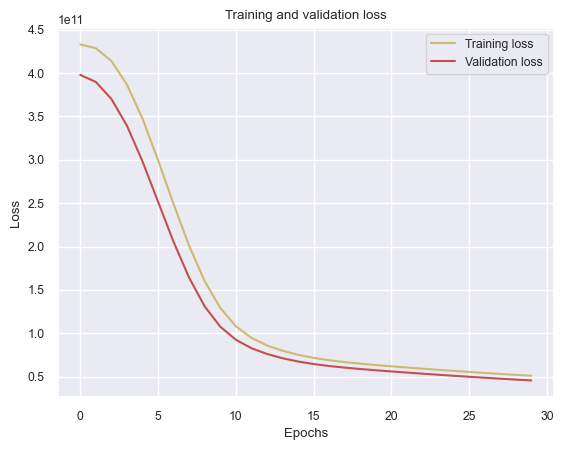

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# 손실(loss) 시각화
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(loss, 'y', label='Training loss')
plt.plot(val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

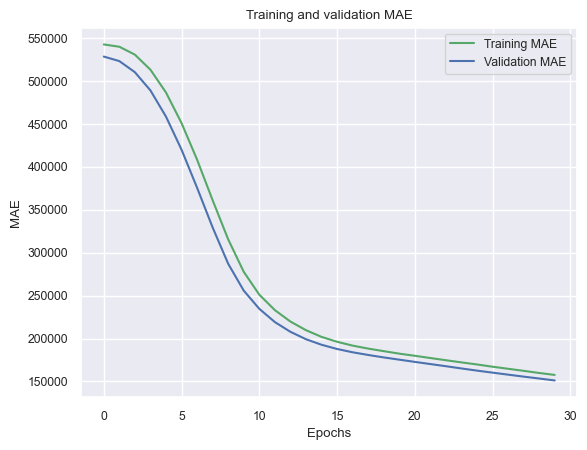

In [60]:
# MAE 시각화
mae = model_history.history['mae']
val_mae = model_history.history['val_mae']

plt.plot(mae, 'g', label='Training MAE')
plt.plot(val_mae, 'b', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [61]:
# R²점수는 회귀 성능 평가의 대표 지표
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")

R2 Score: 0.6173
